# Задание по numpy
1. Напишите свой аналог np.linspace с использованием цикла и с использованием list comprehension. Сравните все три варианта по производительности
1. Сравните по производительности основные операции с массивами (array) numpy и с list

In [38]:
import numpy as np

print(np.linspace(-3.0, 3.0, 7))
print(np.linspace(2.0, 3.0, num=5))
print(np.linspace(2.0, 4.0, num=5, endpoint=False, dtype=int))
print(np.linspace(2.0, 3.0, num=5, retstep=True))


import time

def timelinspace(*args, **kwargs):
    start_time = time.clock()
    ret = np.linspace(*args, **kwargs)
    print (time.clock() - start_time, "seconds")
    return ret


def looplinspace(*args, **kwargs):
    start_time = time.clock()
    num = kwargs.get('num', 50)
    endpoint = kwargs.get('endpoint', True)
    retstep = kwargs.get('retstep', False)
    start = args[0]
    end = args[1]
    if (len(args)>2):
        num = args[2]
    if (num>0):
        ret = np.array(start)
        for i in range(1, num):
            ret = np.hstack((ret,(end-start)/(num-1*endpoint)*i+start))
    else:
        ret=np.array()
    dtype = kwargs.get('dtype', ret.dtype)
    ret = ret.astype(dtype)
#    print(start, end, num, endpoint, retstep, dtype)
    print (time.clock() - start_time, "seconds")
    if(retstep):
        return (ret, (end-start)/(num-1*endpoint))
    return ret


print(looplinspace(-3.0, 3.0, 7))
print(looplinspace(2.0, 3.0, num=5))
print(looplinspace(2.0, 4.0, num=5, endpoint=False, dtype=int))
print(looplinspace(2.0, 3.0, num=5, retstep=True))

def listlinspace(*args, **kwargs):
    start_time = time.clock()
    num = kwargs.get('num', 50)
    endpoint = kwargs.get('endpoint', True)
    retstep = kwargs.get('retstep', False)
    start = args[0]
    end = args[1]
    if (len(args)>2):
        num = args[2]
    ret = [(end-start)/(num-1*endpoint)*i+start for i in range(num)]
    ret = np.array(ret)
    dtype = kwargs.get('dtype', ret.dtype)
    ret = ret.astype(dtype)
#    print(start, end, num, endpoint, retstep, dtype)
    print (time.clock() - start_time, "seconds")
    if(retstep):
        return (ret, (end-start)/(num-1*endpoint))
    return ret


print(listlinspace(-3.0, 3.0, 7))
print(listlinspace(2.0, 3.0, num=5))
print(listlinspace(2.0, 4.0, num=5, endpoint=False, dtype=int))
print(listlinspace(2.0, 3.0, num=5, retstep=True))


print ("time initial:")
timelinspace(-300.0, 300.0, 70000)

print ("time fot loop:")
looplinspace(-300.0, 300.0, 70000)

print ("time fot list comprehension:")
listlinspace(-300.0, 300.0, 70000)

print("finished")

[-3. -2. -1.  0.  1.  2.  3.]
[ 2.    2.25  2.5   2.75  3.  ]
[2 2 2 3 3]
(array([ 2.  ,  2.25,  2.5 ,  2.75,  3.  ]), 0.25)
0.00014066701521642244 seconds
[-3. -2. -1.  0.  1.  2.  3.]
8.6332116666199e-05 seconds
[ 2.    2.25  2.5   2.75  3.  ]
0.00034713962975274626 seconds
[2 2 2 3 3]
0.00012134794019402761 seconds
(array([ 2.  ,  2.25,  2.5 ,  2.75,  3.  ]), 0.25)
3.0186054800651618e-05 seconds
[-3. -2. -1.  0.  1.  2.  3.]
2.475256496836664e-05 seconds
[ 2.    2.25  2.5   2.75  3.  ]
2.6563728170003742e-05 seconds
[2 2 2 3 3]
2.4752564854679804e-05 seconds
(array([ 2.  ,  2.25,  2.5 ,  2.75,  3.  ]), 0.25)
time initial:
0.0005161815364544964 seconds
time fot loop:
2.97744256499368 seconds
time fot list comprehension:
0.030282650142339662 seconds
finished


# Задание по Matplotlib
1. Добавьте подписи к осям и легенду к примеру выше (см. документацию)
1. Постройте график с 5 разными элементарными функциями и сделайте легенду к графику в TeXe
1. Сохраните рисунок в файл строчкой кода на Python

In [39]:
% matplotlib inline

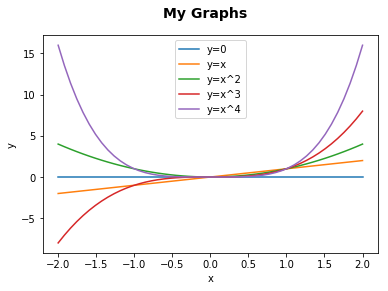

In [61]:
from matplotlib import pylab as plt
fig = plt.figure()
fig.suptitle('My Graphs', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(np.linspace(-2, 2), [0 for z in  np.linspace(-2, 2)], label='y=0')
ax.plot(np.linspace(-2, 2), [z  for z in  np.linspace(-2, 2)], label='y=x')
ax.plot(np.linspace(-2, 2), [z ** 2 for z in  np.linspace(-2, 2)], label='y=x^2')
ax.plot(np.linspace(-2, 2), [z ** 3 for z in  np.linspace(-2, 2)], label='y=x^3')
ax.plot(np.linspace(-2, 2), [z ** 4 for z in  np.linspace(-2, 2)], label='y=x^4')

# Now add the legend with some customizations.
legend = ax.legend()

plt.savefig('firstPlot.png')    
plt.show()